PROBLEM STATEMENT:
    Selling something is not an easy task. A business might have many potential customers, commonly referred as leads, but not enough resources to cater them all. Even most of the leads won’t turn into actual bookings. So there is a need for a system that prioritises the leads, and sorts them on the basis of a score, referred to here as lead score. So whenever a new lead is generated, this system analyses the features of the lead and gives it a score that correlates with chances of it being converted into booking. Such ranking of potential customers not only helps in saving time but also helps in increasing the conversion rate by letting the sales team figure out what leads to spend time on.


In [1]:
#Importing important Libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading the Dataset with Pandas:
# Reading the csv file from dataset
Lead_Scoring_Model = pd.read_csv(r'C:\Users\admin\Downloads\Data_Science_Internship - Dump.csv')

In [3]:
Lead_Scoring_Model.head()

,Unnamed: 0,Agent_id,status,lost_reason,budget,lease,movein,source,source_city,source_country,utm_source,utm_medium,des_city,des_country,room_type,lead_id
0,0,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,LOST,Not responding,NaN,NaN,NaN,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,cd5dc0d9393f3980d11d4ba6f88f8110c2b7a7f7796307...
1,1,299ae77a4ef350ae0dd37d6bba1c002d03444fb1edb236...,LOST,Low budget,NaN,NaN,NaN,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,5372372f3bf5896820cb2819300c3e681820d82c6efc54...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,b94693673a5f7178d1b114e4004ad52377d3244dd24a3d...
2,2,c213697430c006013012dd2aca82dd9732aa0a1a6bca13...,LOST,Not responding,£121 - £180 Per Week,Full Year Course Stay 40 - 44 weeks,31/08/22,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,9b8cc3c63cdf447e463c11544924bf027945cbd29675f7...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,11ab03a1a8c367191355c152f39fe28cae5e426fce49ef...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Ensuite,96ea4e2bf04496c044745938c0299c264c3f4ba079e572...
3,3,eac9815a500f908736d303e23aa227f0957177b0e6756b...,LOST,Low budget,0-0,0,NaN,ba2d0a29556ac20f86f45e4543c0825428cba33fd7a9ea...,a5f0d2d08eb0592087e3a3a2f9c1ba2c67cc30f2efd2bd...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,19372fa44c57a01c37a5a8418779ca3d99b0b59731fb35...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,1d2b34d8add02a182a4129023766ca4585a8ddced0e5b3...
4,4,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,LOST,Junk lead,NaN,NaN,NaN,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,NaN,fc10fffd29cfbe93c55158fb47752a7501c211d253468c...


In [4]:
## Checking the dimension of the dataset
Lead_Scoring_Model.shape

(46608, 16)

In [5]:
## loading  all  the  columns  names  here 
Lead_Scoring_Model.columns

Index(['Unnamed: 0', 'Agent_id', 'status', 'lost_reason', 'budget', 'lease',
       'movein', 'source', 'source_city', 'source_country', 'utm_source',
       'utm_medium', 'des_city', 'des_country', 'room_type', 'lead_id'],
      dtype='object')

In [6]:
# Dropping the irrelevant column Unnamed:0
Lead_Scoring_Model.drop("Unnamed: 0",axis=1, inplace=True)

In [7]:
# Dropping the irrelevant column source
Lead_Scoring_Model.drop("source",axis=1, inplace=True)
# Dropping the irrelevant column utm_medium
Lead_Scoring_Model.drop("utm_medium",axis=1, inplace=True)
# Dropping the irrelevant column source_city
Lead_Scoring_Model.drop("source_city",axis=1, inplace=True)
# Dropping the irrelevant column des_country
Lead_Scoring_Model.drop("des_country",axis=1, inplace=True)

In [8]:
Lead_Scoring_Model.sample(5)

,Agent_id,status,lost_reason,budget,lease,movein,source_country,utm_source,des_city,room_type,lead_id
11926,cec971a0fa216b4f75dce013f2f05d8e74951038f77fd3...,LOST,Not responding,0-0,short-stay,NaN,ef38c2f2eeb87e2cbba80fa7f55f8c08fc75f944cd65f6...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,NaN,1629fb649d98094bdc4c842bc3f4edf35bc40363b24615...
34624,ff614a1caf92ad2900b6dc8287175f32ed48afcfee68ae...,LOST,Junk lead/ Just Enquiring,152,45,09/09/22,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,810c069040f6a9b16fdf976a901755508a87cb0224b169...,NaN,4cb45f4cd15b1a97897d065c9c8945c558935b45ce2bd7...
37142,2fca346db656187102ce806ac732e06a62df0dbb2829e5...,LOST,Low availability,NaN,NaN,23/08/22,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,7f3fa48ca885678134842fa7456f3ece53a97f843b6101...,777e88b51092d314e2b6b9e523fc4dc2f3281c52df171e...,NaN,fa6ff821e03b3912991be725a9dc822abb4173bed6f8de...
18761,8e2d91da4e36f2d82d3df133ac8f1f274430573c394b0b...,WON,NaN,0-100,51,10/09/22,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,44574c4ba2ea74ad4bf1e184133cdbf4e7390a3690beff...,6a5ed83658ef85afc77709cc16ede854ad98e3c2ad8b07...,NaN,c2c9fe5fa92490175aa249eeeb9b8983af7c96332c8f4a...
39226,2fca346db656187102ce806ac732e06a62df0dbb2829e5...,LOST,Low availability,NaN,NaN,NaN,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,0fa4720e8f52f127b3eb09a73a2dc682a95eee72b5d2a9...,NaN,c6384b38d9770822db25b59eb256a3f6c348ef49176071...


In [9]:
#column counts in the datset
Lead_Scoring_Model.value_counts().sum()

21364

In [10]:
#Getting the Unique values from the columns
Lead_Scoring_Model.nunique()

Agent_id            120
status                6
lost_reason          30
budget             1857
lease               311
movein              477
source_country      186
utm_source           35
des_city            220
room_type             5
lead_id           30574
dtype: int64

In [11]:
# To get good overview of the dataset
Lead_Scoring_Model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46608 entries, 0 to 46607
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Agent_id        46608 non-null  object
 1   status          46608 non-null  object
 2   lost_reason     43244 non-null  object
 3   budget          42908 non-null  object
 4   lease           44267 non-null  object
 5   movein          32970 non-null  object
 6   source_country  46608 non-null  object
 7   utm_source      46608 non-null  object
 8   des_city        46608 non-null  object
 9   room_type       23061 non-null  object
 10  lead_id         46608 non-null  object
dtypes: object(11)
memory usage: 3.9+ MB


In [12]:
#checking for null values
Lead_Scoring_Model .isnull().sum()


Agent_id              0
status                0
lost_reason        3364
budget             3700
lease              2341
movein            13638
source_country        0
utm_source            0
des_city              0
room_type         23547
lead_id               0
dtype: int64

<AxesSubplot:>

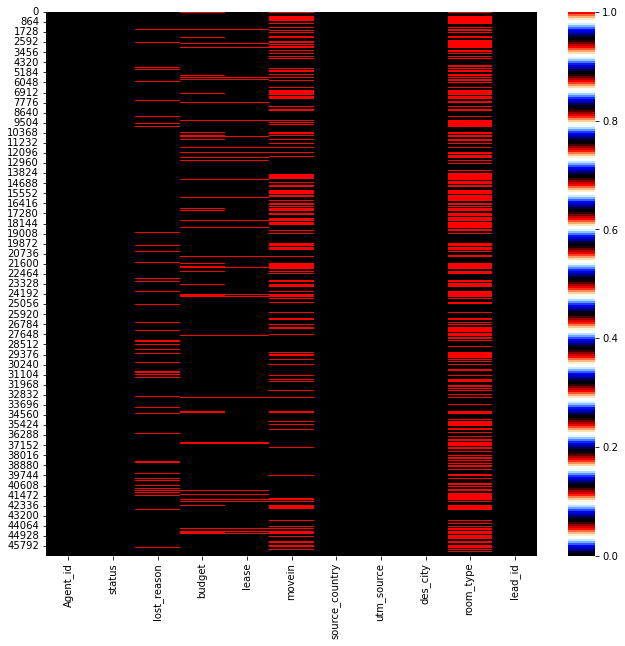

In [13]:
#Checking with the help of heatmap
plt.figure(figsize=(11,10))
sns.heatmap(Lead_Scoring_Model .isnull(), cmap='flag_r')

In [14]:
# Modes of categorical columns
print("The mode of lost_reason is:",Lead_Scoring_Model["lost_reason"].mode())
print("The mode of budget is:",Lead_Scoring_Model["budget"].mode())
print("The mode of lease is:",Lead_Scoring_Model["lease"].mode())
print("The mode of  movein  is:",Lead_Scoring_Model["movein"].mode())
print("The mode of room_type is:",Lead_Scoring_Model["room_type"].mode())


The mode of lost_reason is: 0    Low availability
dtype: object
The mode of budget is: 0    £60 - £120 Per week
dtype: object
The mode of lease is: 0    Full Year Course Stay 40 - 44 weeks
dtype: object
The mode of  movein  is: 0    10/09/22
dtype: object
The mode of room_type is: 0    Ensuite
dtype: object


In [15]:
# Replacing null values in categorical columns
Lead_Scoring_Model["lost_reason"] = Lead_Scoring_Model["lost_reason"].fillna(Lead_Scoring_Model["lost_reason"].mode()[0])
Lead_Scoring_Model["budget"] = Lead_Scoring_Model["budget"].fillna(Lead_Scoring_Model["budget"].mode()[0])
Lead_Scoring_Model["lease"] = Lead_Scoring_Model["lease"].fillna(Lead_Scoring_Model["lease"].mode()[0])
Lead_Scoring_Model["movein"] = Lead_Scoring_Model["movein"].fillna(Lead_Scoring_Model["movein"].mode()[0])
Lead_Scoring_Model["room_type"] = Lead_Scoring_Model["room_type"].fillna(Lead_Scoring_Model["room_type"].mode()[0])

<AxesSubplot:>

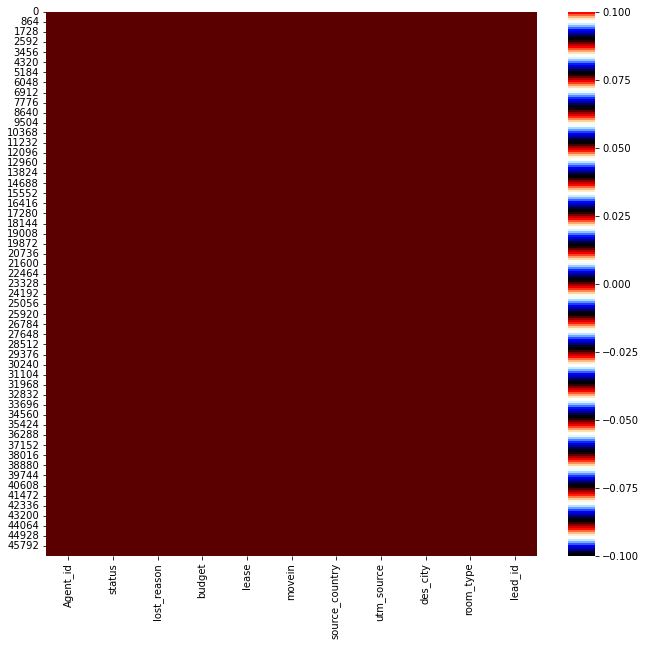

In [16]:
#Checking with the help of heatmap
plt.figure(figsize=(11,10))
sns.heatmap(Lead_Scoring_Model.isna(), cmap='flag_r')

In [17]:
## Checking the dimension of the dataset
Lead_Scoring_Model.shape

(46608, 11)

In [18]:
Lead_Scoring_Model.describe()

,Agent_id,status,lost_reason,budget,lease,movein,source_country,utm_source,des_city,room_type,lead_id
count,46608,46608,46608,46608,46608,46608,46608,46608,46608,46608,46608
unique,120,6,30,1857,311,477,186,35,220,5,30574
top,2fca346db656187102ce806ac732e06a62df0dbb2829e5...,LOST,Low availability,£60 - £120 Per week,Full Year Course Stay 40 - 44 weeks,10/09/22,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,Ensuite,e741bdc636f2e99f2f83b31a64ff4b6d07f2b6a182d1cc...
freq,8186,43244,12256,13562,13452,16091,18812,31125,7361,36024,2


In [19]:
#Checking for blank spaces, random characters in each column
search =[" ","?","-"," ?"," -","? ","- "," ? "," - ","NA","N/A"," NA"," N/A"]
for A in Lead_Scoring_Model:
    for B in search:
        print(f"{A} in {B} = ",end= " ")
        print((Lead_Scoring_Model[A] == B).sum())

Agent_id in   =  0
Agent_id in ? =  0
Agent_id in - =  0
Agent_id in  ? =  0
Agent_id in  - =  0
Agent_id in ?  =  0
Agent_id in -  =  0
Agent_id in  ?  =  0
Agent_id in  -  =  0
Agent_id in NA =  0
Agent_id in N/A =  0
Agent_id in  NA =  0
Agent_id in  N/A =  0
status in   =  0
status in ? =  0
status in - =  0
status in  ? =  0
status in  - =  0
status in ?  =  0
status in -  =  0
status in  ?  =  0
status in  -  =  0
status in NA =  0
status in N/A =  0
status in  NA =  0
status in  N/A =  0
lost_reason in   =  0
lost_reason in ? =  0
lost_reason in - =  0
lost_reason in  ? =  0
lost_reason in  - =  0
lost_reason in ?  =  0
lost_reason in -  =  0
lost_reason in  ?  =  0
lost_reason in  -  =  0
lost_reason in NA =  0
lost_reason in N/A =  0
lost_reason in  NA =  0
lost_reason in  N/A =  0
budget in   =  0
budget in ? =  0
budget in - =  0
budget in  ? =  0
budget in  - =  0
budget in ?  =  0
budget in -  =  0
budget in  ?  =  0
budget in  -  =  0
budget in NA =  0
budget in N/A =  0


In [20]:
(Lead_Scoring_Model=='?').sum()#Checking for blank spaces, random characters in each column
search =[" ","?","-"," ?"," -","? ","- "," ? "," - ","NA","N/A"," NA"," N/A"]
for A in Lead_Scoring_Model:
    for B in search:
        print(f"{A} in {B} = ",end= " ")
        print((Lead_Scoring_Model[A] == B).sum())

Agent_id in   =  0
Agent_id in ? =  0
Agent_id in - =  0
Agent_id in  ? =  0
Agent_id in  - =  0
Agent_id in ?  =  0
Agent_id in -  =  0
Agent_id in  ?  =  0
Agent_id in  -  =  0
Agent_id in NA =  0
Agent_id in N/A =  0
Agent_id in  NA =  0
Agent_id in  N/A =  0
status in   =  0
status in ? =  0
status in - =  0
status in  ? =  0
status in  - =  0
status in ?  =  0
status in -  =  0
status in  ?  =  0
status in  -  =  0
status in NA =  0
status in N/A =  0
status in  NA =  0
status in  N/A =  0
lost_reason in   =  0
lost_reason in ? =  0
lost_reason in - =  0
lost_reason in  ? =  0
lost_reason in  - =  0
lost_reason in ?  =  0
lost_reason in -  =  0
lost_reason in  ?  =  0
lost_reason in  -  =  0
lost_reason in NA =  0
lost_reason in N/A =  0
lost_reason in  NA =  0
lost_reason in  N/A =  0
budget in   =  0
budget in ? =  0
budget in - =  0
budget in  ? =  0
budget in  - =  0
budget in ?  =  0
budget in -  =  0
budget in  ?  =  0
budget in  -  =  0
budget in NA =  0
budget in N/A =  0


In [21]:
Lead_Scoring_Model.isnull().sum()

Agent_id          0
status            0
lost_reason       0
budget            0
lease             0
movein            0
source_country    0
utm_source        0
des_city          0
room_type         0
lead_id           0
dtype: int64

In [22]:
Lead_Scoring_Model.dtypes[Lead_Scoring_Model.dtypes == 'object'] #Identifying the Categorical Columns

Agent_id          object
status            object
lost_reason       object
budget            object
lease             object
movein            object
source_country    object
utm_source        object
des_city          object
room_type         object
lead_id           object
dtype: object

In [23]:
Lead_Scoring_Model.dtypes[Lead_Scoring_Model.dtypes != 'object']#Identifying the Continuous/discrete Columns

Series([], dtype: object)

In [24]:
Lead_Scoring_Model.describe()

,Agent_id,status,lost_reason,budget,lease,movein,source_country,utm_source,des_city,room_type,lead_id
count,46608,46608,46608,46608,46608,46608,46608,46608,46608,46608,46608
unique,120,6,30,1857,311,477,186,35,220,5,30574
top,2fca346db656187102ce806ac732e06a62df0dbb2829e5...,LOST,Low availability,£60 - £120 Per week,Full Year Course Stay 40 - 44 weeks,10/09/22,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,Ensuite,e741bdc636f2e99f2f83b31a64ff4b6d07f2b6a182d1cc...
freq,8186,43244,12256,13562,13452,16091,18812,31125,7361,36024,2


In [25]:
#Encoding:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
for i in Lead_Scoring_Model.columns:
    if Lead_Scoring_Model[i].dtypes == "object" :
        Lead_Scoring_Model[i] = enc.fit_transform(Lead_Scoring_Model[i].values.reshape(-1,1))

In [26]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
Lead_Scoring_Model['Agent_id'] = labelencoder.fit_transform(Lead_Scoring_Model['Agent_id'])
Lead_Scoring_Model['status'] = labelencoder.fit_transform(Lead_Scoring_Model['status'])
Lead_Scoring_Model['lost_reason'] = labelencoder.fit_transform(Lead_Scoring_Model['lost_reason'])
Lead_Scoring_Model['budget'] = labelencoder.fit_transform(Lead_Scoring_Model['budget'])
Lead_Scoring_Model['lease'] = labelencoder.fit_transform(Lead_Scoring_Model['lease'])
Lead_Scoring_Model['movein'] = labelencoder.fit_transform(Lead_Scoring_Model['movein'])
Lead_Scoring_Model['source_country'] = labelencoder.fit_transform(Lead_Scoring_Model['source_country'])
Lead_Scoring_Model['utm_source'] = labelencoder.fit_transform(Lead_Scoring_Model['utm_source'])
Lead_Scoring_Model['des_city'] = labelencoder.fit_transform(Lead_Scoring_Model['des_city'])
Lead_Scoring_Model['room_type'] = labelencoder.fit_transform(Lead_Scoring_Model['room_type'])
Lead_Scoring_Model['lead_id'] = labelencoder.fit_transform(Lead_Scoring_Model['lead_id'])




Lead_Scoring_Model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46608 entries, 0 to 46607
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Agent_id        46608 non-null  int64
 1   status          46608 non-null  int64
 2   lost_reason     46608 non-null  int64
 3   budget          46608 non-null  int64
 4   lease           46608 non-null  int64
 5   movein          46608 non-null  int64
 6   source_country  46608 non-null  int64
 7   utm_source      46608 non-null  int64
 8   des_city        46608 non-null  int64
 9   room_type       46608 non-null  int64
 10  lead_id         46608 non-null  int64
dtypes: int64(11)
memory usage: 3.9 MB


In [27]:
Lead_Scoring_Model.sample(5)

,Agent_id,status,lost_reason,budget,lease,movein,source_country,utm_source,des_city,room_type,lead_id
6744,49,2,18,1758,266,475,101,26,89,1,27898
16046,67,2,21,941,300,242,110,19,18,0,4755
3104,58,2,20,1840,266,471,146,26,114,1,520
1695,6,5,15,1059,152,166,167,26,114,0,10197
38225,70,2,21,1679,286,284,156,26,74,1,771


In [28]:
Lead_Scoring_Model.describe()

,Agent_id,status,lost_reason,budget,lease,movein,source_country,utm_source,des_city,room_type,lead_id
count,46608.000000,46608.000000,46608.000000,46608.000000,46608.000000,46608.000000,46608.000000,46608.000000,46608.000000,46608.000000,46608.000000
mean,52.448056,2.202369,17.751695,1319.070524,212.222001,213.464191,131.246481,22.964062,116.542074,0.501094,15286.955630
std,35.941921,0.749010,5.749547,651.815615,102.816272,119.768404,43.671223,6.941907,65.972329,1.035408,8832.993223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,2.000000,15.000000,928.000000,197.000000,166.000000,101.000000,22.000000,70.000000,0.000000,7642.750000
50%,43.000000,2.000000,18.000000,1758.000000,266.000000,166.000000,154.000000,26.000000,117.000000,0.000000,15265.000000
75%,83.000000,2.000000,21.000000,1840.000000,266.000000,284.000000,167.000000,26.000000,175.000000,0.000000,22947.250000
max,119.000000,5.000000,29.000000,1856.000000,310.000000,476.000000,185.000000,34.000000,219.000000,4.000000,30573.000000


<AxesSubplot:>

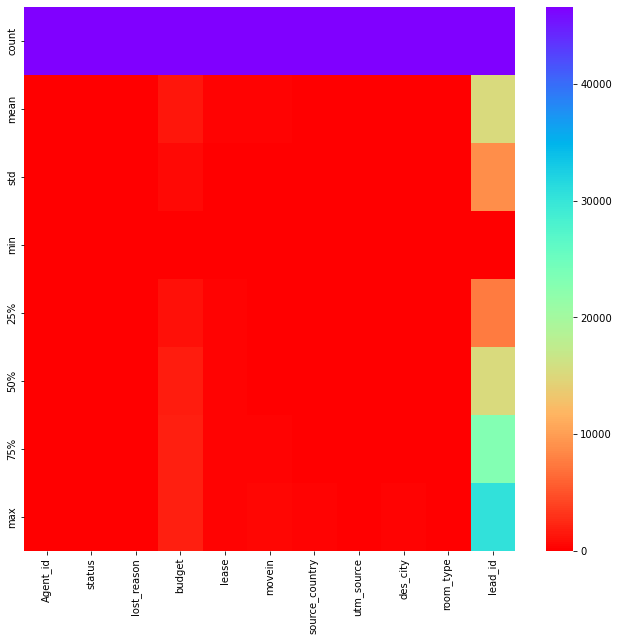

In [29]:
#Checking with the help of heatmap
plt.figure(figsize=(11,10))
sns.heatmap(Lead_Scoring_Model.describe(), cmap='rainbow_r')

In [30]:
(Lead_Scoring_Model=='?').sum()

Agent_id          0
status            0
lost_reason       0
budget            0
lease             0
movein            0
source_country    0
utm_source        0
des_city          0
room_type         0
lead_id           0
dtype: int64

In [31]:
#Using KNN Imputation technique for imputing missing data.
from sklearn.impute import KNNImputer
imp = KNNImputer(n_neighbors=2)
Lead_Scoring_Model[['lead_id']] = imp.fit_transform(Lead_Scoring_Model[['lead_id']])
Lead_Scoring_Model.isnull().sum()

Agent_id          0
status            0
lost_reason       0
budget            0
lease             0
movein            0
source_country    0
utm_source        0
des_city          0
room_type         0
lead_id           0
dtype: int64

<AxesSubplot:>

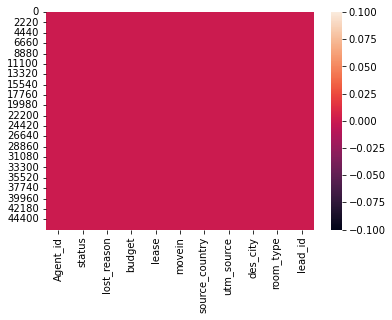

In [32]:
sns.heatmap(Lead_Scoring_Model.isnull())

# EDA

In [33]:
#Analyzing the Target Class
Lead_Scoring_Model.lead_id.unique()

array([24487., 22098., 17972., ...,  3303.,  3905., 13998.])

In [34]:
Lead_Scoring_Model['lead_id'].value_counts()

27580.0    2
14988.0    2
26421.0    2
9034.0     2
26801.0    2
          ..
970.0      1
19959.0    1
20819.0    1
14615.0    1
13998.0    1
Name: lead_id, Length: 30574, dtype: int64

<AxesSubplot:xlabel='lead_id', ylabel='Count'>

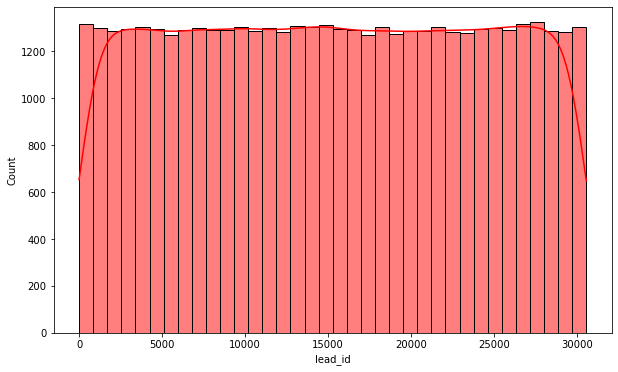

In [35]:
plt.figure(figsize = (10,6))
sns.histplot(Lead_Scoring_Model.lead_id, kde='True ', color='red')

Text(0.5, 1.0, 'budget as per  Agent_id')

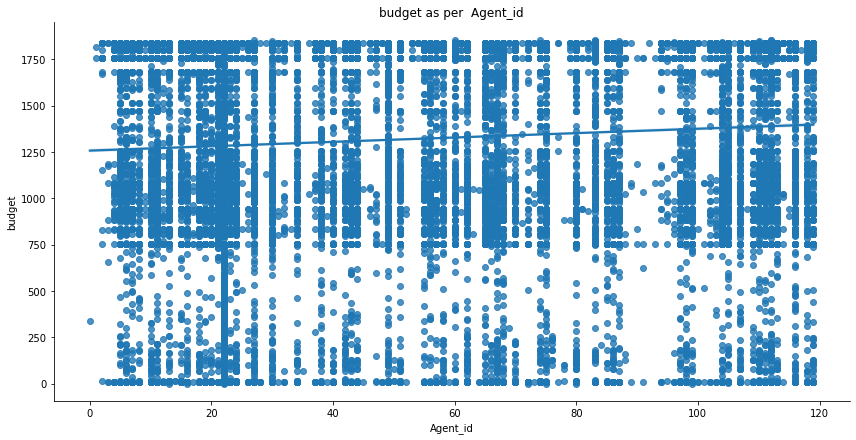

In [36]:
sns.lmplot(data=Lead_Scoring_Model, x ='Agent_id', y ='budget', height =6, aspect =2)
plt.title('budget as per  Agent_id')

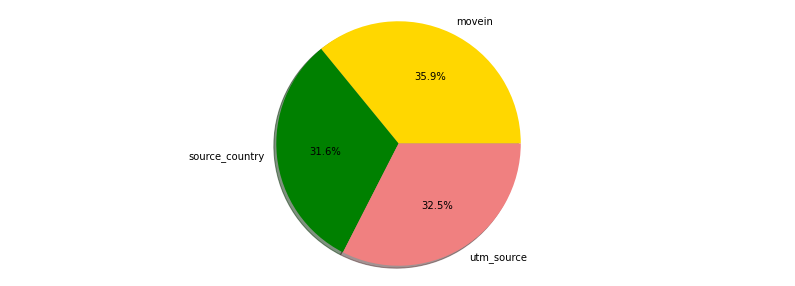

In [37]:
labels = 'movein','source_country','utm_source'
sizes = [190,167,172]
colors = ['gold','green','lightcoral']


#plot
plt.figure(figsize=(14,5))
plt.pie(sizes,labels=labels,colors = colors,
        autopct='%1.1f%%',shadow=True)
plt.axis('equal')
plt.show()

In [38]:
Lead_Scoring_Model['budget'].value_counts()

1840    13562
1758     8954
10       5733
1799     2171
753      1516
        ...  
374         1
210         1
1752        1
923         1
286         1
Name: budget, Length: 1857, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

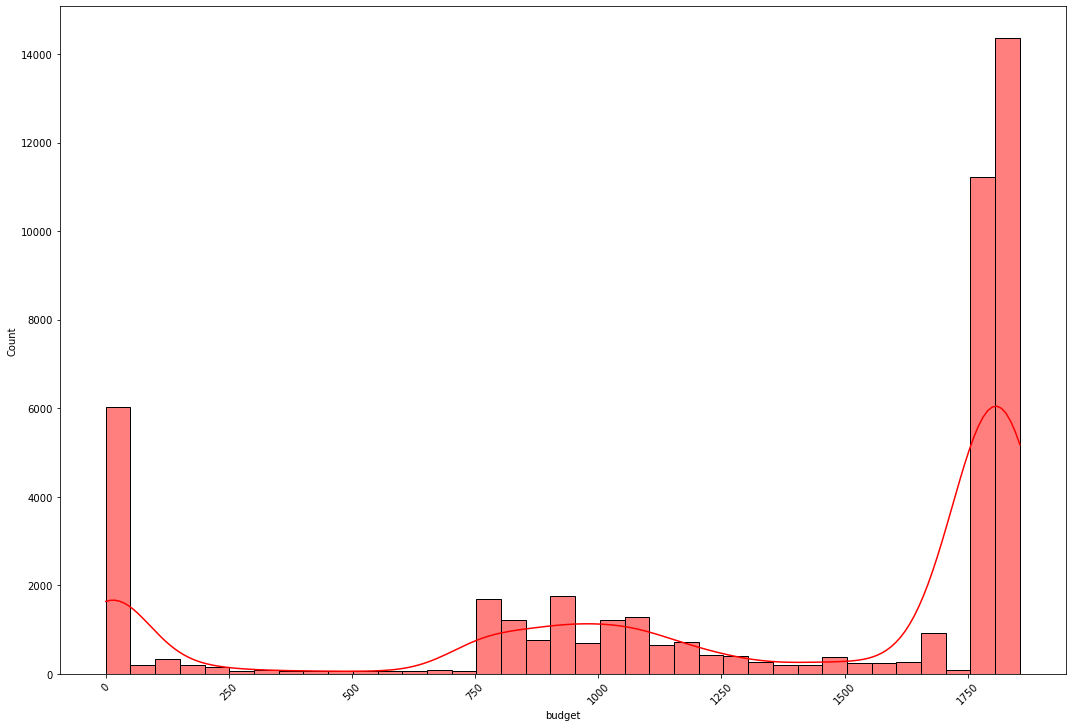

In [39]:
plt.figure(figsize = (15,10))
sns.histplot(Lead_Scoring_Model.budget, kde='True ', color='r')
plt.tight_layout()
plt.xticks(rotation = 45)
plt.show

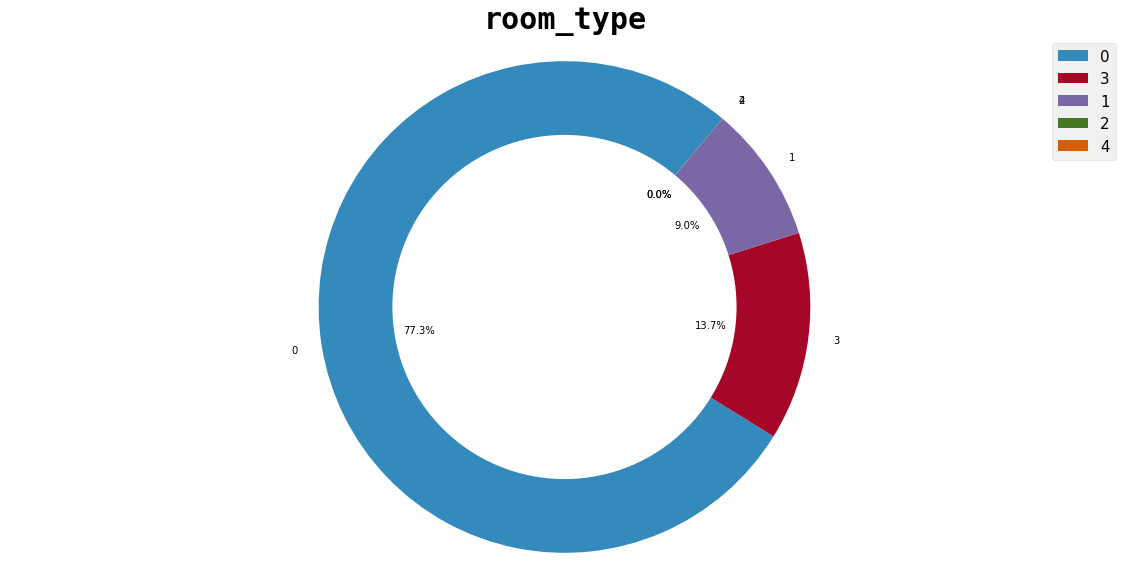

In [40]:
#UNIVARIATE ANALYSIS
# Creating a donut chart for 'Outlet_Identifier'
relation = Lead_Scoring_Model['room_type'].value_counts()

plt.style.use('bmh')
plt.figure(figsize=(20, 10))
plt.pie(relation.values, labels=relation.index,
        startangle=50, autopct='%1.1f%%')
centre_circle = plt.Circle((0, 0), 0.7, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('room_type', fontdict={
          'fontname': 'Monospace', 'fontsize': 30, 'fontweight': 'bold'})
plt.axis('equal')
plt.legend(prop={'size': 15})
plt.show()

array([[<AxesSubplot:title={'center':'Agent_id'}>,
        <AxesSubplot:title={'center':'status'}>,
        <AxesSubplot:title={'center':'lost_reason'}>],
       [<AxesSubplot:title={'center':'budget'}>,
        <AxesSubplot:title={'center':'lease'}>,
        <AxesSubplot:title={'center':'movein'}>],
       [<AxesSubplot:title={'center':'source_country'}>,
        <AxesSubplot:title={'center':'utm_source'}>,
        <AxesSubplot:title={'center':'des_city'}>],
       [<AxesSubplot:title={'center':'room_type'}>,
        <AxesSubplot:title={'center':'lead_id'}>, <AxesSubplot:>]],
      dtype=object)

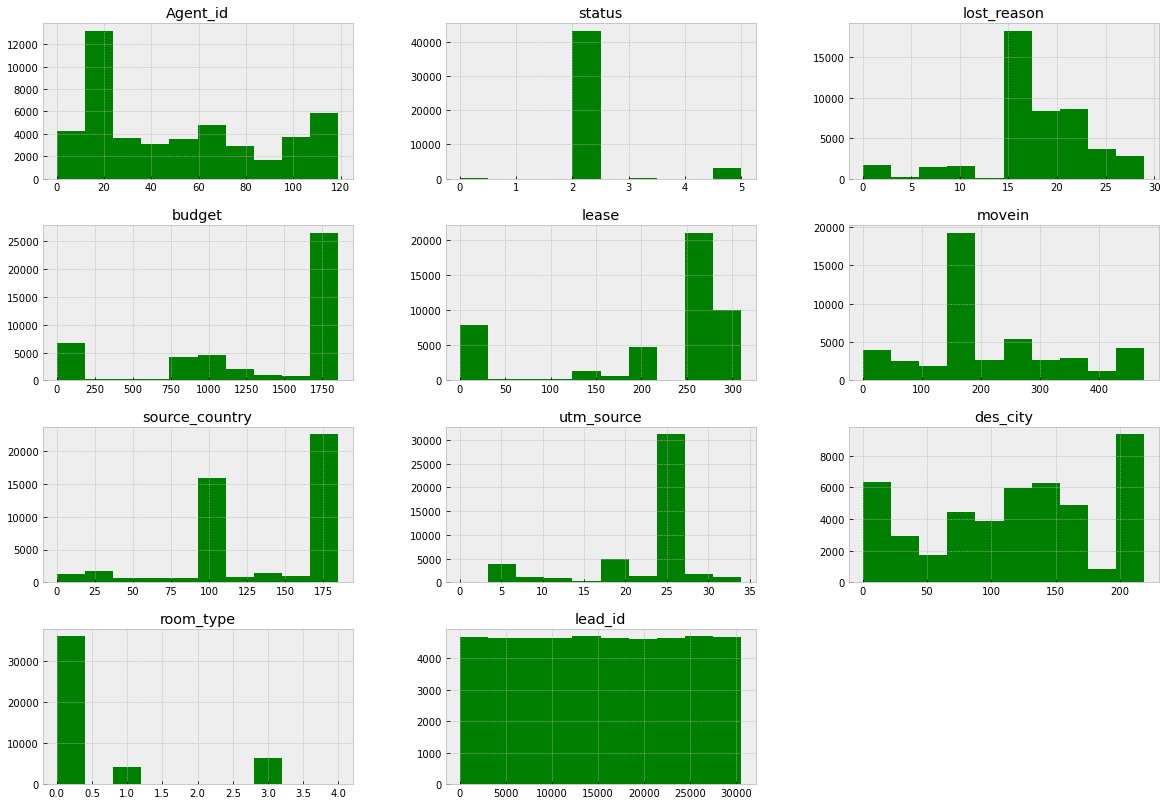

In [41]:
Lead_Scoring_Model.hist(figsize=(20,14), color ='green')

<AxesSubplot:>

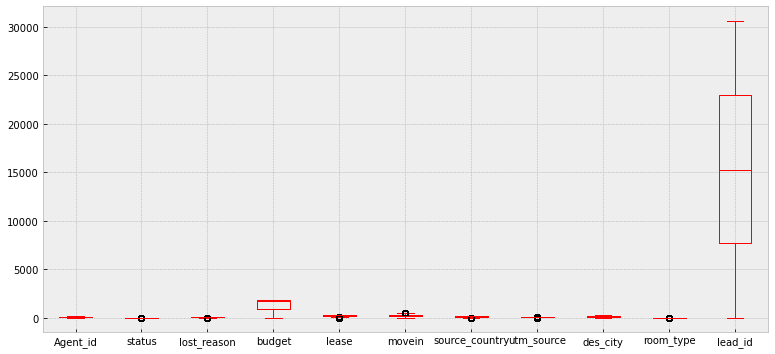

In [42]:
Lead_Scoring_Model.plot(kind="box", figsize = (13,6), color="r")

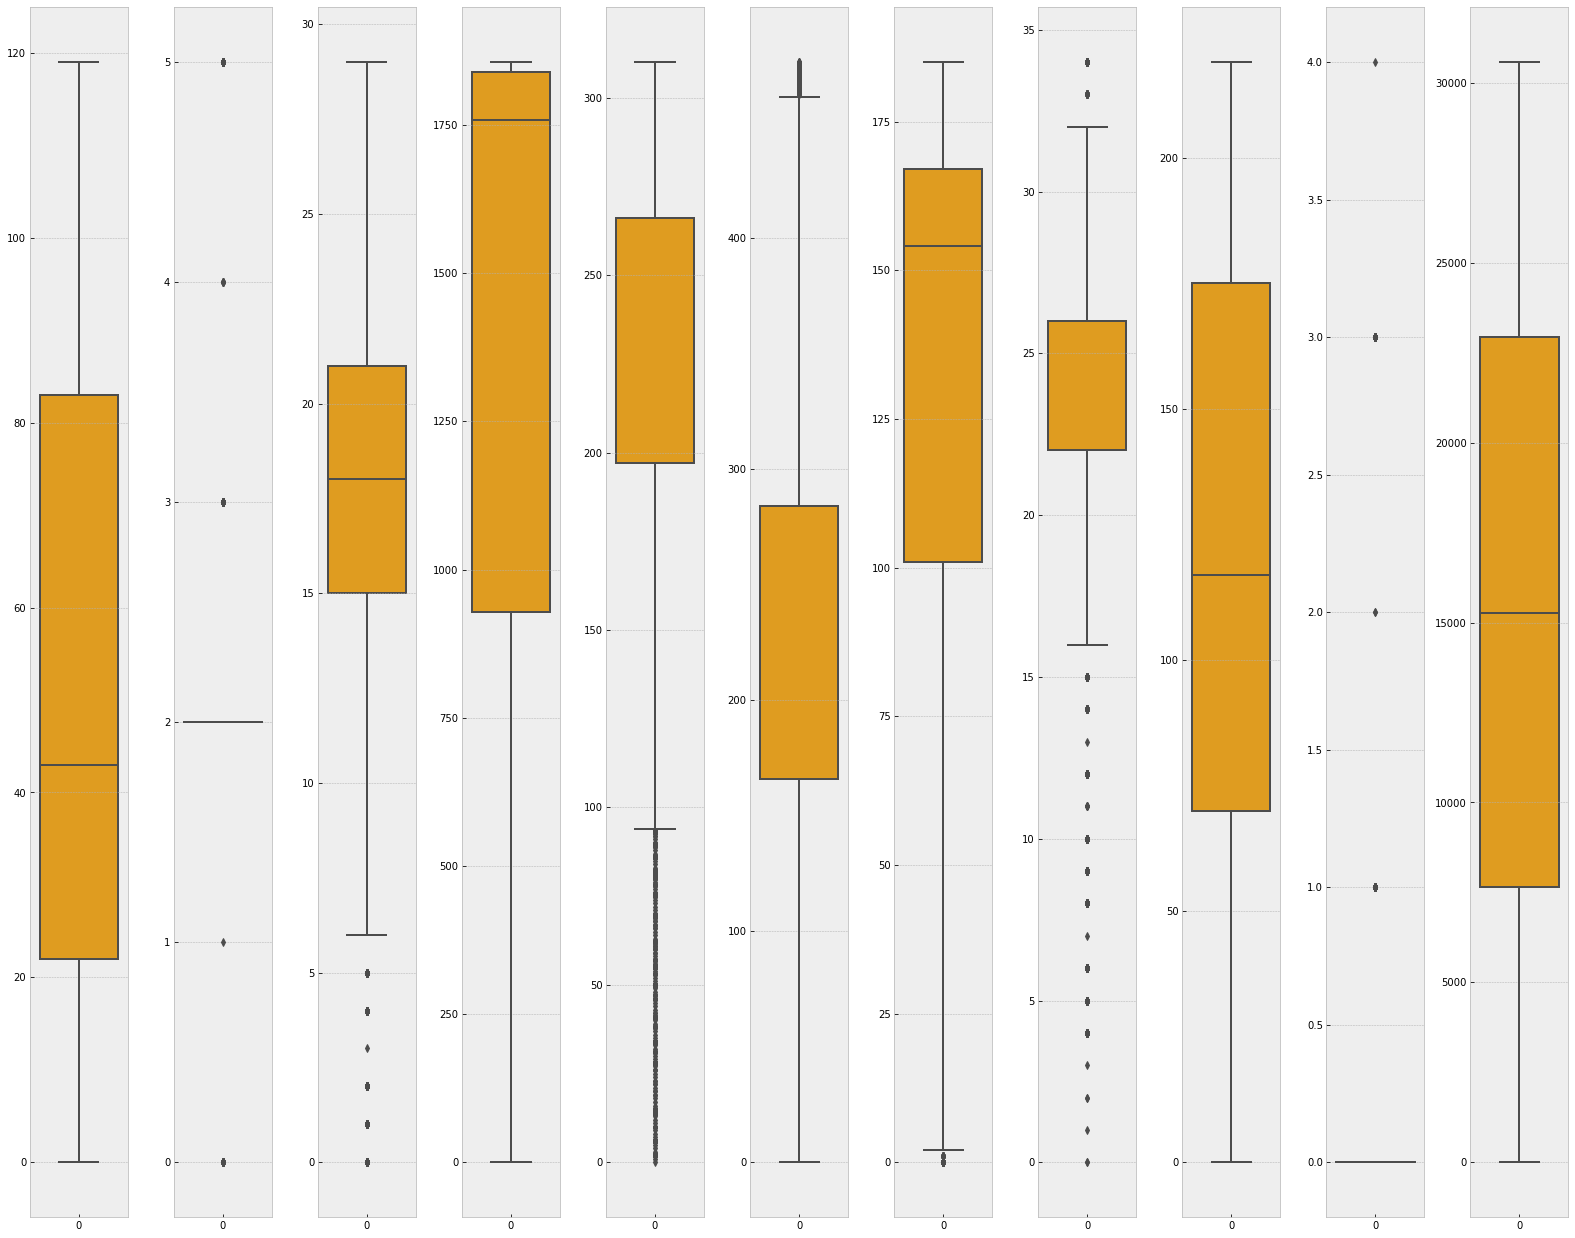

In [43]:
#Removing Outliers:
collist=Lead_Scoring_Model.columns.values
ncol=30
nrows=14
plt.figure(figsize=(2*ncol,8*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(data=Lead_Scoring_Model[collist[i]],color='orange',orient='v')
    plt.tight_layout()

In [44]:
from scipy.stats import zscore
z=np.abs(zscore(Lead_Scoring_Model))
new_Lead_Scoring_Model=Lead_Scoring_Model[(z<3).all(axis=1)]
new_Lead_Scoring_Model.shape

(42474, 11)

In [45]:
Lead_Scoring_Model.shape

(46608, 11)

In [46]:
Data_loss = ((6000-5850)/6000)*100
Data_loss

2.5

In [47]:
#Skewness:
new_Lead_Scoring_Model.skew()

Agent_id          0.494485
status            2.259034
lost_reason      -0.477872
budget           -1.018830
lease            -1.307948
movein            0.593907
source_country   -0.949366
utm_source       -1.659371
des_city         -0.146537
room_type         1.839684
lead_id          -0.000870
dtype: float64

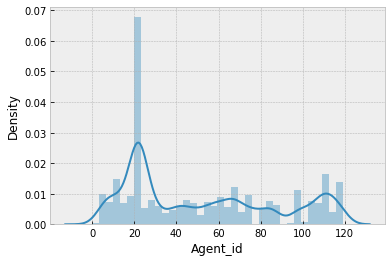

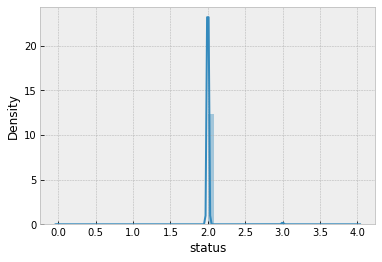

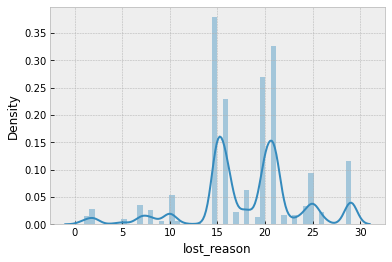

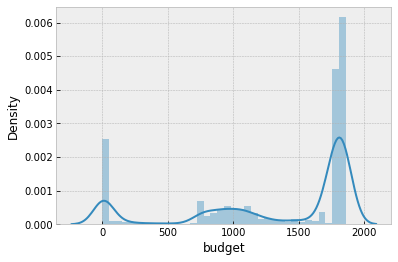

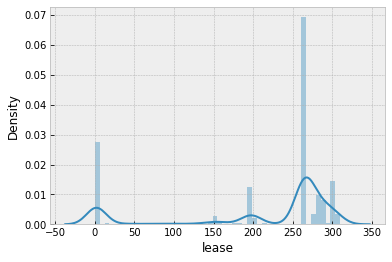

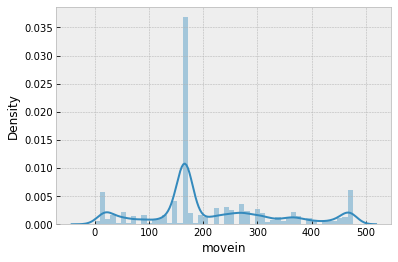

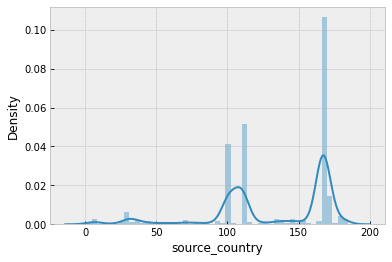

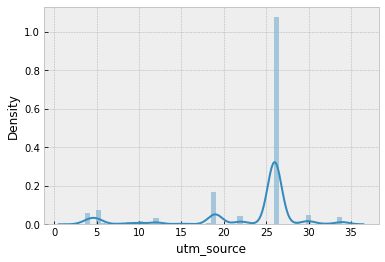

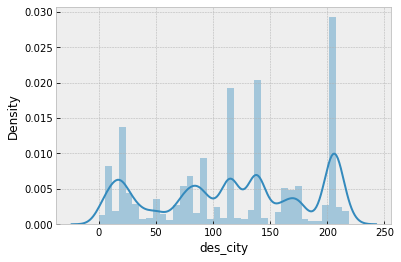

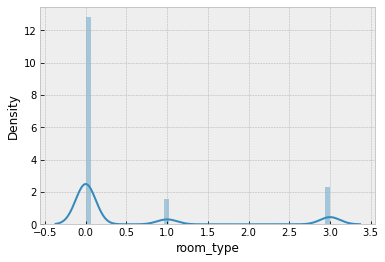

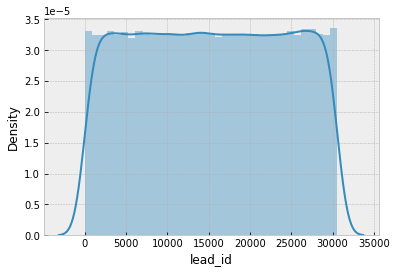

In [48]:
for i in new_Lead_Scoring_Model:
    sns.distplot(new_Lead_Scoring_Model[i])
    plt.show()

In [49]:
#Correlation Analysis
Lead_Scoring_Model.corr()

,Agent_id,status,lost_reason,budget,lease,movein,source_country,utm_source,des_city,room_type,lead_id
Agent_id,1.000000,0.033199,0.066431,0.064964,0.056207,0.033852,0.027686,0.026941,0.072326,0.039985,0.003790
status,0.033199,1.000000,-0.129310,-0.030749,-0.003074,-0.010534,0.036101,-0.002484,-0.019450,-0.000645,-0.002893
lost_reason,0.066431,-0.129310,1.000000,0.044081,0.039371,0.018183,-0.007733,0.015724,0.015237,0.059761,-0.006517
budget,0.064964,-0.030749,0.044081,1.000000,0.660804,0.248614,0.102975,-0.004067,-0.031321,0.336854,-0.006540
lease,0.056207,-0.003074,0.039371,0.660804,1.000000,0.210935,0.099918,0.056371,-0.025825,0.252216,-0.008382
movein,0.033852,-0.010534,0.018183,0.248614,0.210935,1.000000,0.075574,0.109400,-0.030245,0.159629,0.003352
source_country,0.027686,0.036101,-0.007733,0.102975,0.099918,0.075574,1.000000,0.093534,-0.108571,0.106571,0.002828
utm_source,0.026941,-0.002484,0.015724,-0.004067,0.056371,0.109400,0.093534,1.000000,-0.049682,0.166961,0.009505
des_city,0.072326,-0.019450,0.015237,-0.031321,-0.025825,-0.030245,-0.108571,-0.049682,1.000000,-0.059272,0.000348
room_type,0.039985,-0.000645,0.059761,0.336854,0.252216,0.159629,0.106571,0.166961,-0.059272,1.000000,0.003384


Text(0.5, 1.0, 'Correlation matrix')

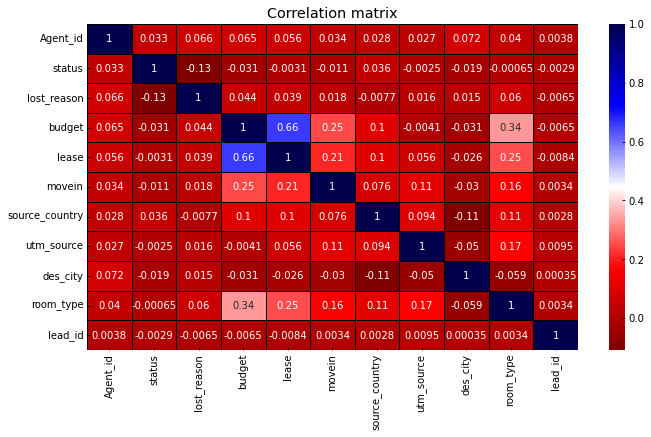

In [50]:
#Correalation using the Heatmap
plt.figure(figsize=(11,6))
sns.heatmap(Lead_Scoring_Model.corr(), annot =True, cmap='seismic_r' , linecolor='black', linewidth=1,  robust=True)
plt.title('Correlation matrix')

In [51]:
#Spliting the data into Feature and Target:
x = Lead_Scoring_Model.drop(columns = "lead_id")
y = Lead_Scoring_Model["lead_id"]

In [52]:
x.shape


(46608, 10)

In [53]:
y.shape

(46608,)

In [54]:
#Scaling:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=scaler.fit_transform(x)

In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [56]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("We are getting the Best Accuracy is",maxAccu," on Random_state",maxRS)

We are getting the Best Accuracy is 0.0003310008546751897  on Random_state 105


In [57]:
#Train Test Split the data:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=177)

In [58]:
x_train.shape

(32625, 10)

In [59]:
x_test.shape

(13983, 10)

In [60]:
y_train.shape

(32625,)

In [61]:
y_test.shape

(13983,)

In [62]:
#Random forest Regression Model
# Checking R2 score for Random Forest Regressor
RFR=RandomForestRegressor(n_estimators=600, random_state=69)
RFR.fit(x_train,y_train)

# prediction
predRFR=RFR.predict(x_test)
print('R2_Score:',r2_score(y_test,predRFR))
print('Mean abs error:',mean_absolute_error(y_test, predRFR))
print('Mean squared error:',mean_squared_error(y_test, predRFR))


R2_Score: -0.08504132279479348
Mean abs error: 7841.516978964713
Mean squared error: 84104923.61344813


In [63]:
# Checking r2score for Linear Regression
LR = LinearRegression()
LR.fit(x_train,y_train)

# prediction
predLR=LR.predict(x_test)
print('R2_score:',r2_score(y_test,predLR))
print('Mean abs error:',mean_absolute_error(y_test, predLR))
print('Mean squared error:',mean_squared_error(y_test, predLR))

R2_score: -0.0010149546478501748
Mean abs error: 7628.113715371268
Mean squared error: 77591778.7902526


In [64]:
# Checking R2 score for KNN regressor
knn=KNeighborsRegressor(n_neighbors=9 )
knn.fit(x_train,y_train)

#prediction
predknn=knn.predict(x_test)
print('R2_Score:',r2_score(y_test,predknn))
print('Mean abs error:',mean_absolute_error(y_test, predknn))
print('Mean squared error:',mean_squared_error(y_test, predknn))

R2_Score: -0.11732494939690996
Mean abs error: 7914.099454099024
Mean squared error: 86607327.80054617


In [65]:
#Support Vector Regression Mode
# Checking R2 score for svr
sv= SVR(kernel='linear')
sv.fit(x_train,y_train)

#prediction
predsv=sv.predict(x_test)
print('R2_Score:',r2_score(y_test,predsv))
print('Mean abs error:',mean_absolute_error(y_test, predsv))
print('Mean squared error:',mean_squared_error(y_test, predsv))

R2_Score: -0.0009338802697100856
Mean abs error: 7627.779759407263
Mean squared error: 77585494.46334521


In [66]:
#Grdient boosting Regressor
# Checking R2 score for svr
Gb= GradientBoostingRegressor(n_estimators=400,  random_state=69, learning_rate=0.1, max_depth=3)
Gb.fit(x_train,y_train)

#prediction
predGb=Gb.predict(x_test)
print('R2_Score:',r2_score(y_test,predGb))
print('Mean abs error:',mean_absolute_error(y_test, predGb))
print('Mean squared error:',mean_squared_error(y_test, predGb))


R2_Score: -0.011158795599787164
Mean abs error: 7653.195169596617
Mean squared error: 78378059.41430491


In [67]:
import numpy as np
a = np.array(y_test)
predicted = np.array(Gb.predict(x_test))
Lead_Scoring_Model= pd.DataFrame({"Original":a,"Predicted":predicted},index= range(len(a)))
Lead_Scoring_Model

,Original,Predicted
0,25859.0,16737.621401
1,22576.0,15705.708729
2,13085.0,13987.022615
3,24552.0,14780.599971
4,10547.0,15486.278791
...,...,...
13978,21391.0,13282.561031
13979,4649.0,14770.473349
13980,17579.0,15649.823266
13981,23477.0,15547.597856
